In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import random
# Use matplotlib in notebook output
%matplotlib inline

In [24]:
df=pd.read_csv('generic.csv')

In [35]:
df.head()
df = df.dropna()

In [36]:
df['condition'].value_counts()

0.0    321
1.0    318
2.0    288
Name: condition, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f753c2eff40>]],
      dtype=object)

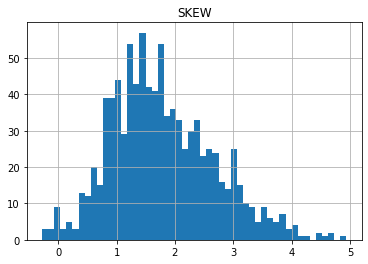

In [37]:
df.hist(column='SKEW',bins=50)

In [38]:
df.columns

Index(['MEAN', 'MAX', 'MIN', 'RANGE', 'KURT', 'SKEW', 'MEAN_1ST_GRAD',
       'STD_1ST_GRAD', 'MEAN_2ND_GRAD', 'STD_2ND_GRAD', 'ALSC', 'INSC', 'APSC',
       'RMSC', 'MIN_PEAKS', 'MAX_PEAKS', 'STD_PEAKS', 'MEAN_PEAKS',
       'MIN_ONSET', 'MAX_ONSET', 'STD_ONSET', 'MEAN_ONSET', 'MEAN_LOG',
       'MEAN_SQRT', 'MAX_LOG', 'MAX_SQRT', 'MIN_LOG', 'MIN_SQRT', 'RANGE_LOG',
       'RANGE_SQRT', 'KURT_YEO_JON', 'SKEW_YEO_JON', 'MEAN_1ST_GRAD_YEO_JON',
       'STD_1ST_GRAD_YEO_JON', 'MEAN_2ND_GRAD_YEO_JON', 'STD_2ND_GRAD_YEO_JON',
       'ALSC_LOG', 'ALSC_SQRT', 'INSC_LOG', 'INSC_SQRT', 'APSC_LOG',
       'APSC_SQRT', 'RMSC_LOG', 'RMSC_SQRT', 'MIN_PEAKS_LOG', 'MIN_PEAKS_SQRT',
       'MAX_PEAKS_LOG', 'MAX_PEAKS_SQRT', 'STD_PEAKS_YEO_JON',
       'MEAN_PEAKS_LOG', 'MEAN_PEAKS_SQRT', 'MIN_ONSET_LOG', 'MIN_ONSET_SQRT',
       'MAX_ONSET_LOG', 'MAX_ONSET_SQRT', 'STD_ONSET_YEO_JON',
       'MEAN_ONSET_LOG', 'MEAN_ONSET_SQRT', 'NasaTLX', 'subject_id',
       'condition'],
      dtype='object')

In [39]:
X=df[['MEAN', 'MAX', 'MIN', 'RANGE', 'KURT', 'SKEW', 'MEAN_1ST_GRAD',
       'STD_1ST_GRAD', 'MEAN_2ND_GRAD', 'STD_2ND_GRAD', 'ALSC', 'INSC', 'APSC',
       'RMSC', 'MIN_PEAKS', 'MAX_PEAKS', 'STD_PEAKS', 'MEAN_PEAKS',
       'MIN_ONSET', 'MAX_ONSET', 'STD_ONSET', 'MEAN_ONSET', 'MEAN_LOG',
       'MEAN_SQRT', 'MAX_LOG', 'MAX_SQRT', 'MIN_LOG', 'MIN_SQRT', 'RANGE_LOG',
       'RANGE_SQRT', 'KURT_YEO_JON', 'SKEW_YEO_JON', 'MEAN_1ST_GRAD_YEO_JON',
       'STD_1ST_GRAD_YEO_JON', 'MEAN_2ND_GRAD_YEO_JON', 'STD_2ND_GRAD_YEO_JON',
       'ALSC_LOG', 'ALSC_SQRT', 'INSC_LOG', 'INSC_SQRT', 'APSC_LOG',
       'APSC_SQRT', 'RMSC_LOG', 'RMSC_SQRT', 'MIN_PEAKS_LOG', 'MIN_PEAKS_SQRT',
       'MAX_PEAKS_LOG', 'MAX_PEAKS_SQRT', 'STD_PEAKS_YEO_JON',
       'MEAN_PEAKS_LOG', 'MEAN_PEAKS_SQRT', 'MIN_ONSET_LOG', 'MIN_ONSET_SQRT',
       'MAX_ONSET_LOG', 'MAX_ONSET_SQRT', 'STD_ONSET_YEO_JON',
       'MEAN_ONSET_LOG', 'MEAN_ONSET_SQRT', 'NasaTLX', 'subject_id']]
X[0:5]

,MEAN,MAX,MIN,RANGE,KURT,SKEW,MEAN_1ST_GRAD,STD_1ST_GRAD,MEAN_2ND_GRAD,STD_2ND_GRAD,...,MEAN_PEAKS_SQRT,MIN_ONSET_LOG,MIN_ONSET_SQRT,MAX_ONSET_LOG,MAX_ONSET_SQRT,STD_ONSET_YEO_JON,MEAN_ONSET_LOG,MEAN_ONSET_SQRT,NasaTLX,subject_id
0,0.004253,0.019560,0.001990,0.017570,20.915630,3.786213,-0.000050,0.001891,0.000065,0.001654,...,2.256595,0.864792,1.172396,3.115467,4.641546,1.547503,1.806592,2.256027,41.9,19.0
1,0.213681,0.549792,0.061582,0.488210,-0.212470,1.065222,-0.018682,0.129339,0.018813,0.114925,...,3.712098,1.105587,1.421617,4.433812,9.124251,2.715429,2.704835,3.735217,61.4,22.0
2,0.007752,0.025986,0.002701,0.023285,3.708117,1.538769,0.000156,0.003263,-0.000313,0.003243,...,2.054597,0.722971,1.029829,3.023065,4.422013,1.360222,1.659345,2.062975,51.7,13.0
3,0.049358,0.169965,0.017070,0.152896,3.209756,1.786002,0.001838,0.028175,0.003158,0.022892,...,1.945951,0.703107,1.009960,2.724676,3.775111,1.228759,1.564734,1.944583,57.3,9.0
4,0.005466,0.015709,0.001605,0.014104,0.936805,1.002262,-0.000129,0.002273,0.000118,0.002061,...,2.164625,0.684566,0.991418,3.213883,4.886255,1.504692,1.737747,2.164376,63.7,24.0


In [40]:
y=df['condition'].values
y[0:5]

array([0., 2., 1., 2., 0.])

In [ ]:
plotx = []
ploty = []
for i in range(len(df)):
    plotx.append(df['MEAN'][i])
    ploty.append(y[i])
plt.plot(plotx,ploty, 'bo')

# Helper Functions

In [ ]:
def random_centers(dim,k):
    centers = []
    for i in range(k):
        center = []
        for d in range(dim):
            rand = random.randint(0,100)
            center.append(rand)
        centers.append(center)
    return centers

def point_clustering(data, centers, dims, first_cluster=False):
    for point in data:
        nearest_center = 0
        nearest_center_dist = None
        for i in range(0, len(centers)):
            euclidean_dist = 0
            for d in range(0, dims):
                dist = abs(point[d] - centers[i][d])
                euclidean_dist += dist
            euclidean_dist = np.sqrt(euclidean_dist)
            if nearest_center_dist == None:
                nearest_center_dist = euclidean_dist
                nearest_center = i
            elif nearest_center_dist > euclidean_dist:
                nearest_center_dist = euclidean_dist
                nearest_center = i
        if first_cluster:
            point.append(nearest_center)
        else:
            point[-1] = nearest_center
    return data


def mean_center(data, centers, dims):
    print('centers:', centers, 'dims:', dims)
    new_centers = []
    for i in range(len(centers)):
        new_center = []
        n_of_points = 0
        total_of_points = []
        for point in data:
            if point[-1] == i:
                n_of_points += 1
                for dim in range(0, dims):
                    if dim < len(total_of_points):
                        total_of_points[dim] += point[dim]
                    else:
                        total_of_points.append(point[dim])
        if len(total_of_points) != 0:
            for dim in range(0, dims):
                print(total_of_points, dim)
                new_center.append(total_of_points[dim] / n_of_points)
            new_centers.append(new_center)
        else:
            new_centers.append(centers[i])

    return new_centers

#  K means algorithm

In [ ]:
def train_k_means_clustering(data, k=2, epochs=5):
    dims = len(data[0])
    print('data[0]:', data[0])
    centers = random_centers(dims, k)

    clustered_data = point_clustering(data, centers, dims, first_cluster=True)

    for i in range(epochs):
        centers = mean_center(clustered_data, centers, dims)
        clustered_data = point_clustering(data, centers, dims, first_cluster=False)

    return centers


def predict_k_means_clustering(point, centers):
    dims = len(point)
    center_dims = len(centers[0])

    if dims != center_dims:
        raise ValueError('Point given for prediction have', dims, 'dimensions but centers have', center_dims,
                         'dimensions')

    nearest_center = None
    nearest_dist = None

    for i in range(len(centers)):
        euclidean_dist = 0
        for dim in range(1, dims):
            dist = point[dim] - centers[i][dim]
            euclidean_dist += dist ** 2
        euclidean_dist = np.sqrt(euclidean_dist)
        if nearest_dist == None:
            nearest_dist = euclidean_dist
            nearest_center = i
        elif nearest_dist > euclidean_dist:
            nearest_dist = euclidean_dist
            nearest_center = i
        print('center:', i, 'dist:', euclidean_dist)

    return nearest_center

# Centres

In [ ]:
centers = train_k_means_clustering(X, k=2, epochs=5)
print(centers)

point = [110,3]
print(predict_k_means_clustering(point, centers))

# Final Cluster Centres for mean column

In [ ]:
plt.plot(plotx,ploty, 'bo', centers[0][0], centers[0][1],'ro', centers[1][0], centers[1][1], 'go', point[0], point[1], 'yo')